1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [ ]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import numpy as np
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [ ]:
df[df.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [ ]:
df=df.drop_duplicates().reset_index(drop=True)

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
 print('no of nulls:',df.isnull().sum())

no of nulls: Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [ ]:
for i in dict(df.dtypes):
 if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==   'float64'):
  print(i , " : ", df[df[i]<0].shape[0])

Price  :  0
Age_08_04  :  0
KM  :  0
HP  :  0
Automatic  :  0
cc  :  0
Doors  :  0
Cylinders  :  0
Gears  :  0
Weight  :  0


In [ ]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [ ]:
print(i,":",df[df[i]<0].sum())

Weight : Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: object


In [ ]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [ ]:
df['Fuel_Type'].nunique()

3

In [ ]:
p=pd.get_dummies(df['Fuel_Type'])

In [ ]:
df.drop('Fuel_Type',axis=1,inplace=True)

In [ ]:
df=pd.concat([df,p],axis=1)

In [ ]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
CNG             2
Diesel          2
Petrol          2
dtype: int64

In [ ]:
df.dtypes

Price        int64
Age_08_04    int64
KM           int64
HP           int64
Automatic    int64
cc           int64
Doors        int64
Cylinders    int64
Gears        int64
Weight       int64
CNG           bool
Diesel        bool
Petrol        bool
dtype: object

In [ ]:
df.drop('Cylinders',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears',
       'Weight', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

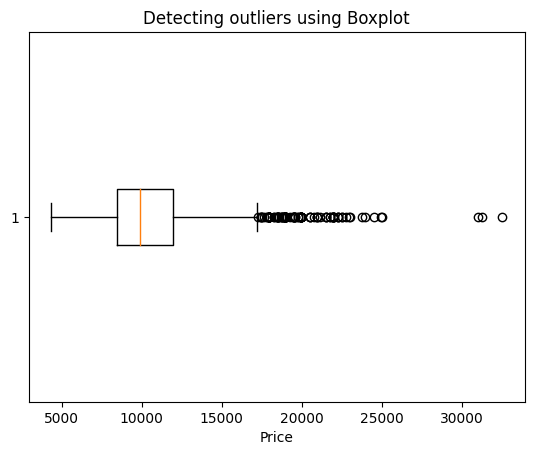

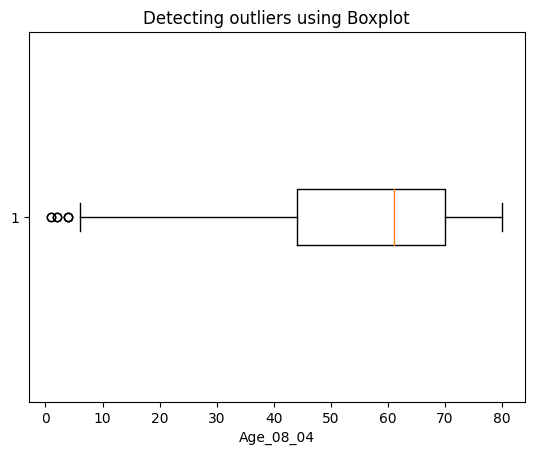

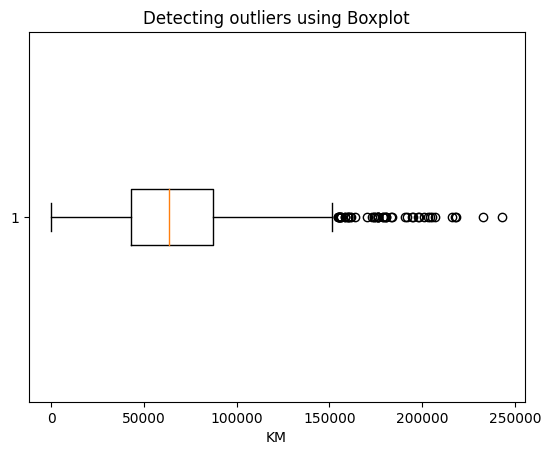

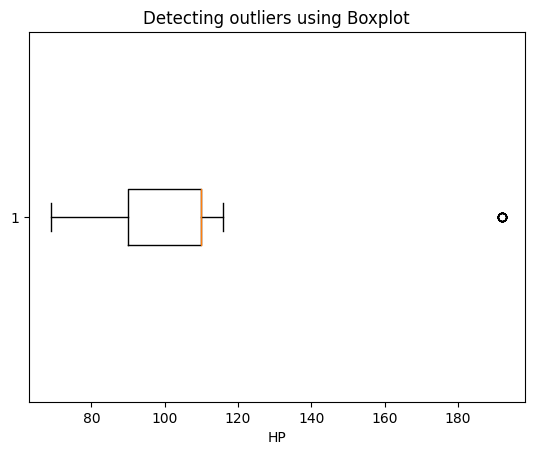

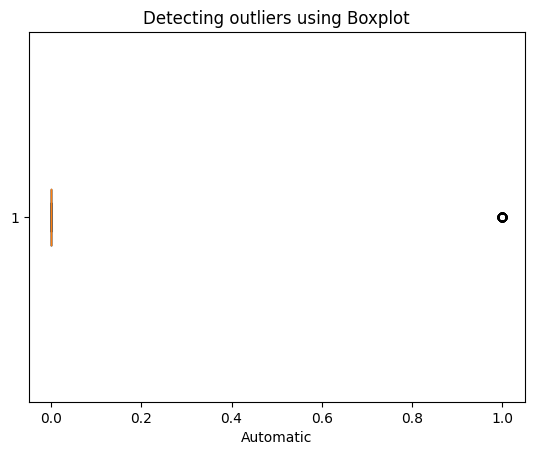

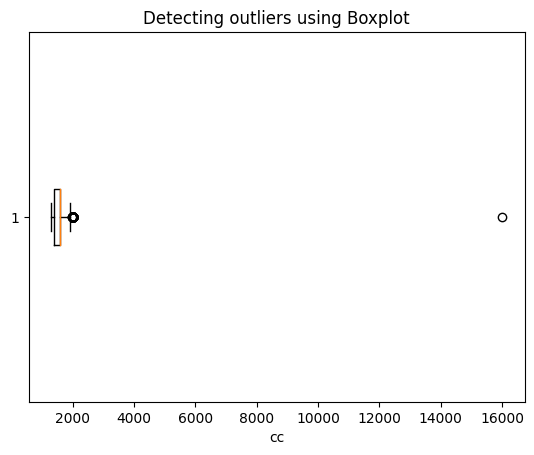

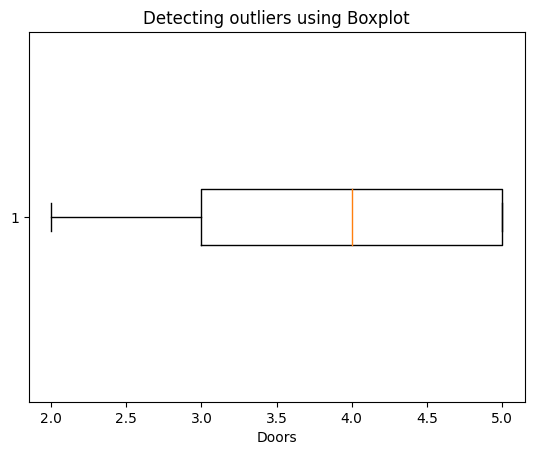

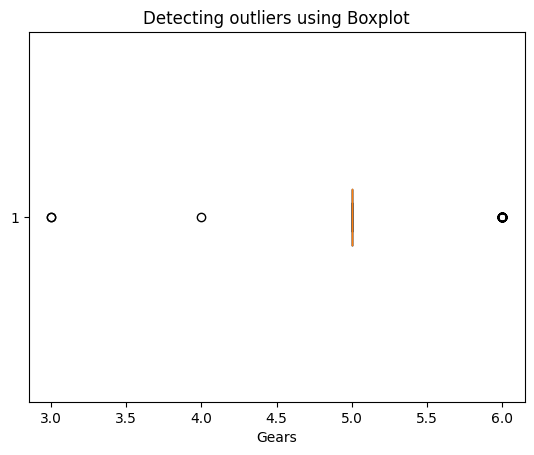

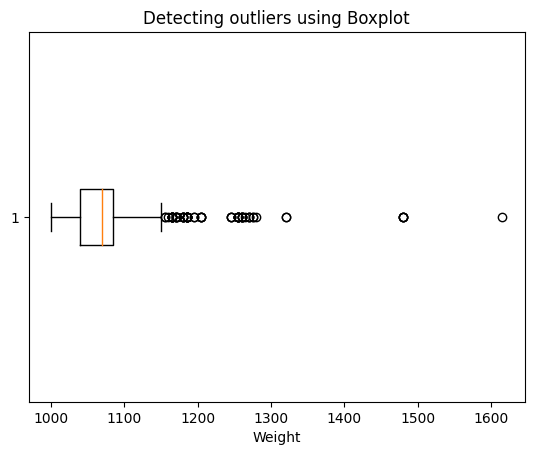

In [ ]:
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [ ]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
HP             12
Automatic       2
cc             13
Doors           4
Gears           4
Weight         59
CNG             2
Diesel          2
Petrol          2
dtype: int64

In [ ]:
# import numpy as np
# outliers = []
# def detect_outliers_zscore(data):
#  thres = 3
#  mean = np.mean(data)
#  std = np.std(data)
#  for i in data:
#   z_score = (i-mean)/std
#   if (np.abs(z_score) > thres):
#    outliers.append(i)
#  return outliers

In [ ]:
# for i in dict(df.dtypes):
#  outliers = []
#  if i == 'Price' or i=='Age_08_04' or i=='KM'or i=='Weight':
#   sample_outliers = detect_outliers_zscore(df[i])
#   print("Column: ", i)
#   print("Outliers from Z-scores method: ", sample_outliers)
#   if len(sample_outliers) > 0:
#    median = np.median(df[i])
#    for j in sample_outliers:
#     df[i] = np.where(df[i]==j, median, df[i])
#    print("After treatment: ")
#    outliers = []
#    sample_outliers = detect_outliers_zscore(df[i])
#    print("Outliers from Z-scores method: ", sample_outliers)


In [ ]:
mappings = {}
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'bool':
  mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
  df[i] = df[i].map(lambda x: mappings[i][x])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


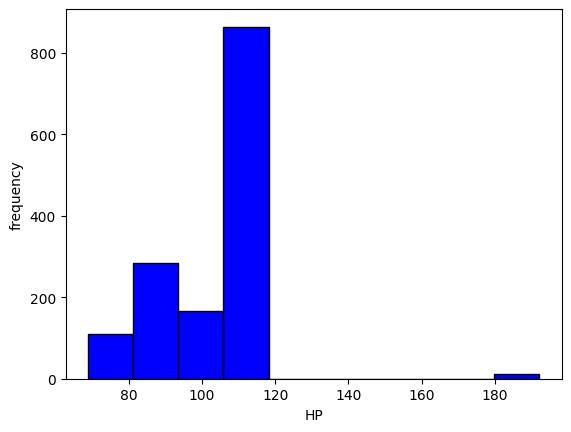

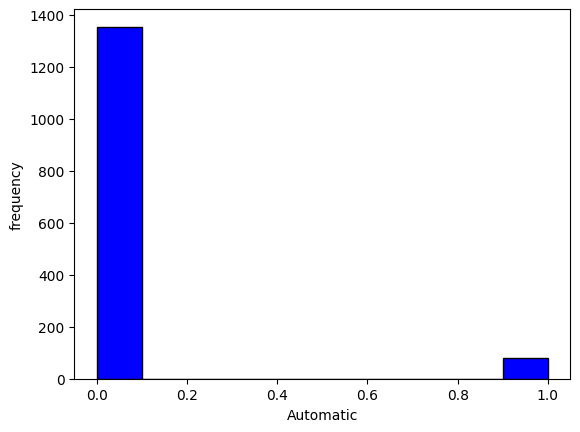

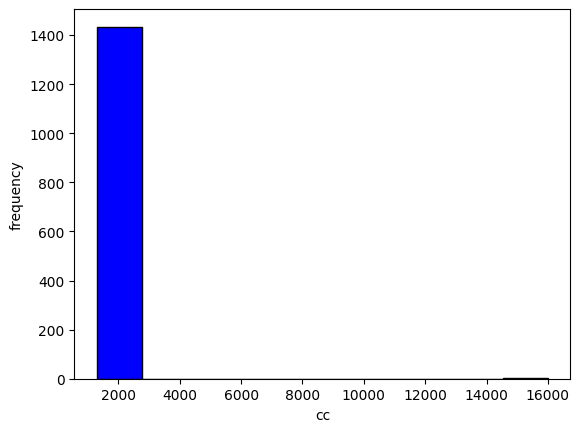

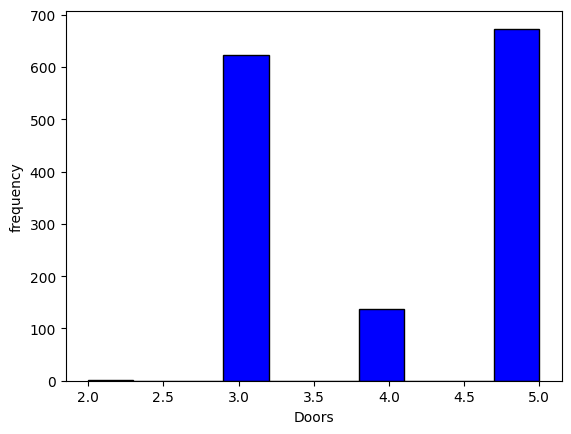

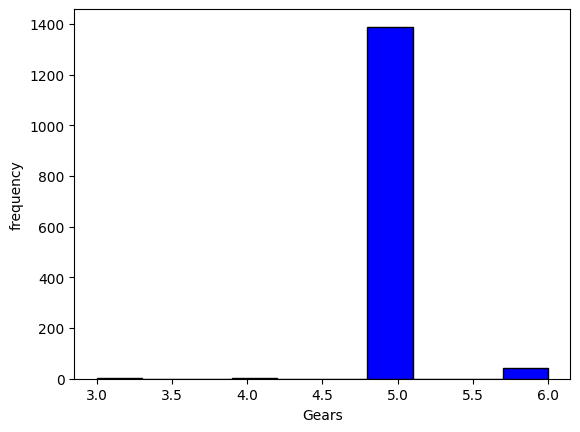

In [ ]:
for i in dict(df.dtypes):
  if i == 'Fuel_Type' or i=='HP' or i=='Automatic'or i=='cc' or i=='Doors' or i=='Cylinders' or i=='Gears':
    plt.hist(df[i],color='blue',edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.show()

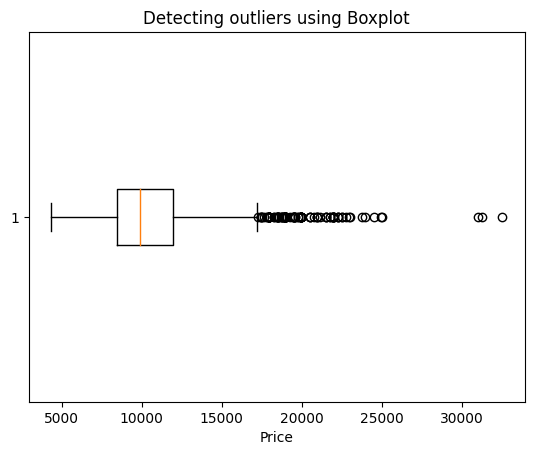

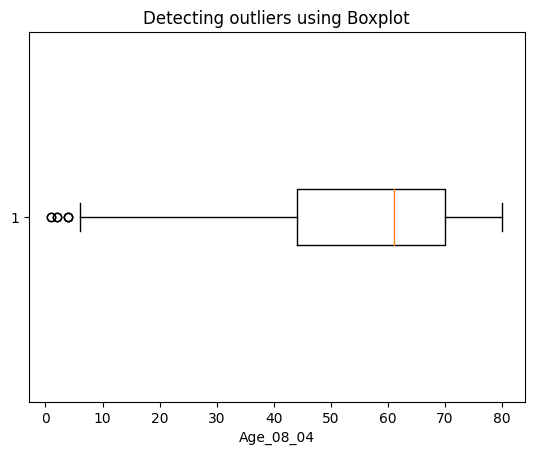

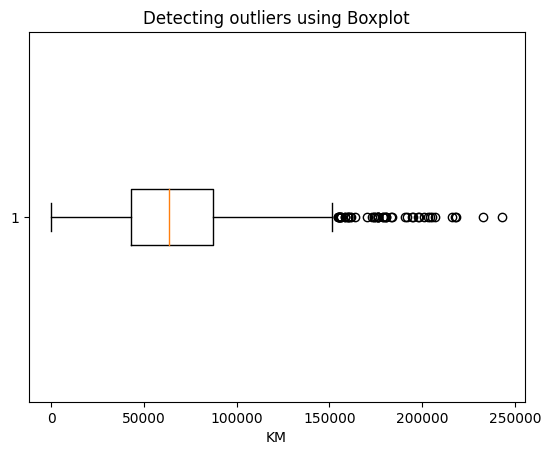

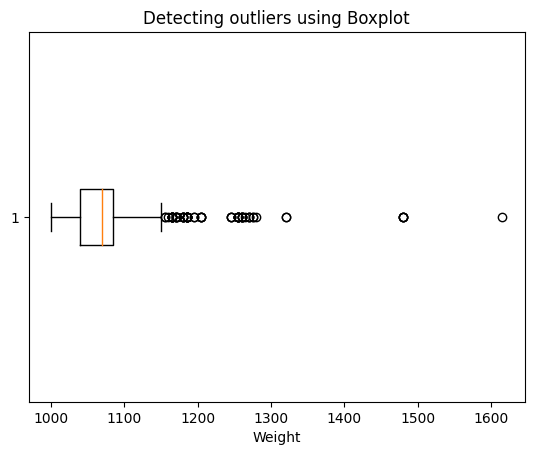

In [ ]:
for i in dict(df.dtypes):
 if i == 'Price' or i=='Age_08_04' or i=='KM'or i=='Weight':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()


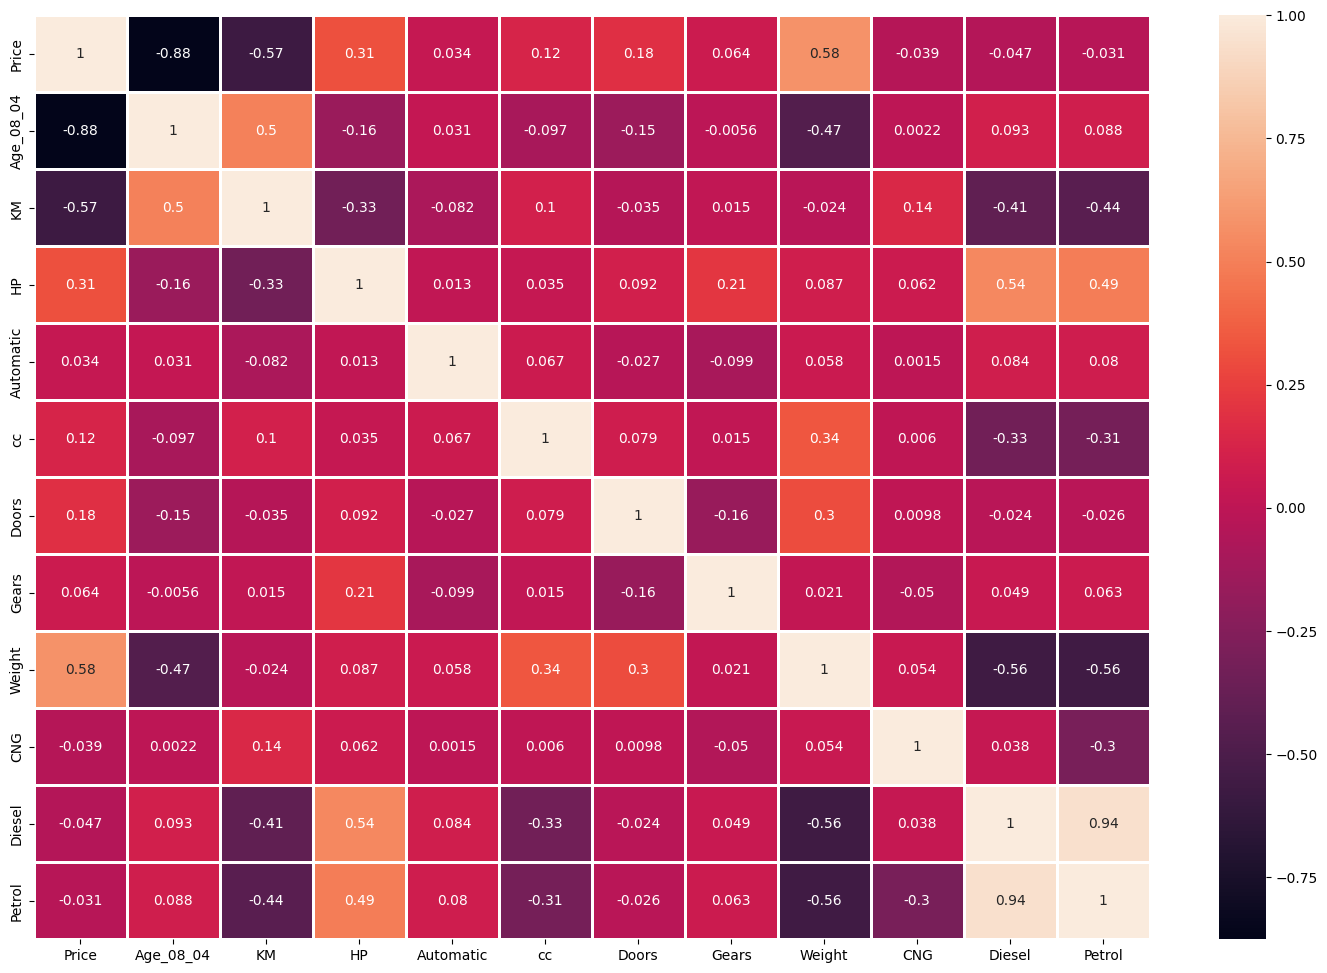

In [ ]:
plt.figure(figsize = (18, 12))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
HP             12
Automatic       2
cc             13
Doors           4
Gears           4
Weight         59
CNG             2
Diesel          2
Petrol          2
dtype: int64

In [ ]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,CNG,Diesel,Petrol
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.575869,-0.039449,-0.046612,-0.031356
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.466484,0.002198,0.093058,0.088169
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,-0.023969,0.144013,-0.407497,-0.437397
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,0.087143,0.062203,0.537116,0.492362
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,0.058499,0.001467,0.084248,0.079997
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.335077,0.006019,-0.326780,-0.314200
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.301734,0.009761,-0.023538,-0.025746
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,0.021238,-0.049548,0.048706,0.063079
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,1.000000,0.053530,-0.564649,-0.557315
CNG,-0.039449,0.002198,0.144013,0.062203,0.001467,0.006019,0.009761,-0.049548,0.053530,1.000000,0.037964,-0.297688


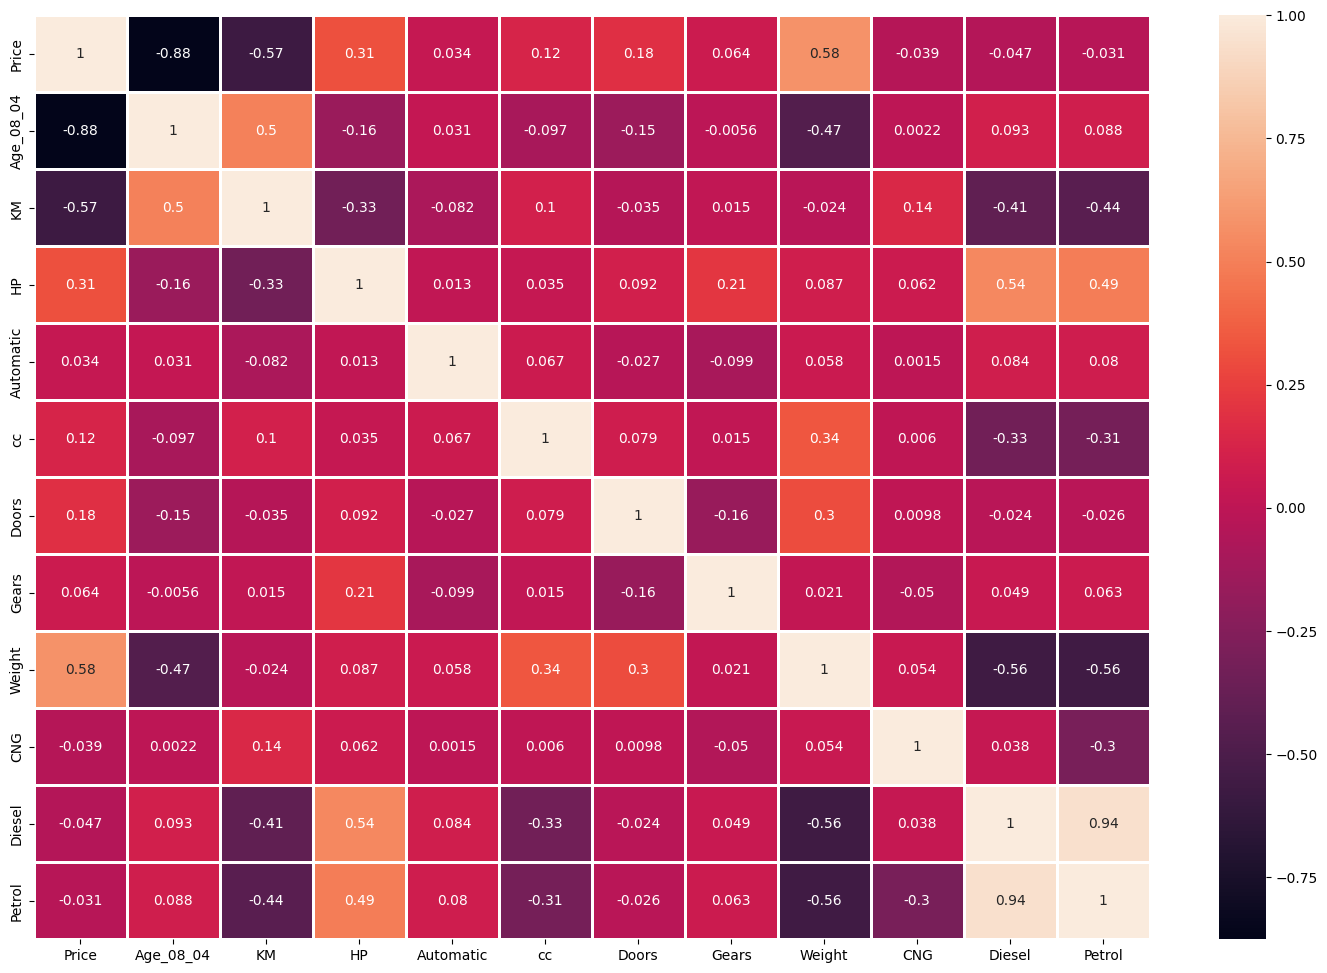

In [ ]:
plt.figure(figsize = (18, 12))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

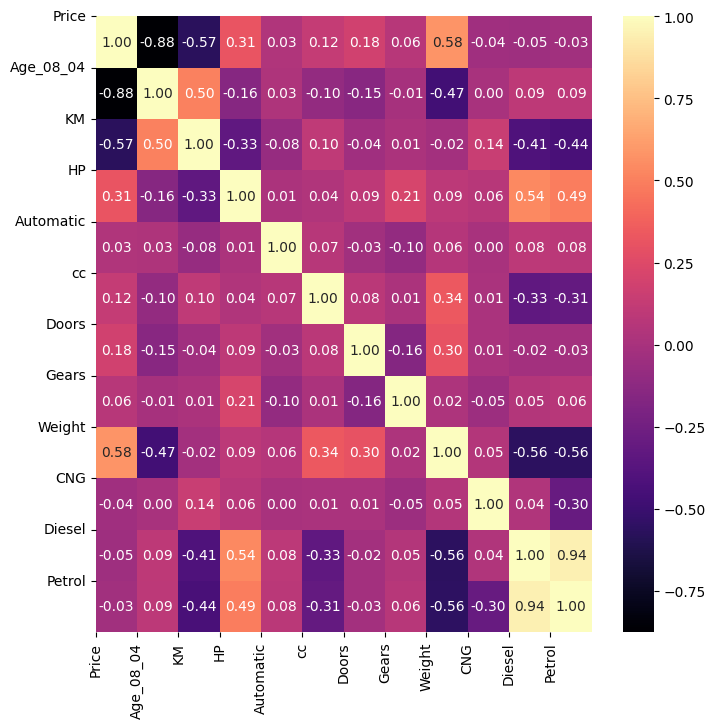

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

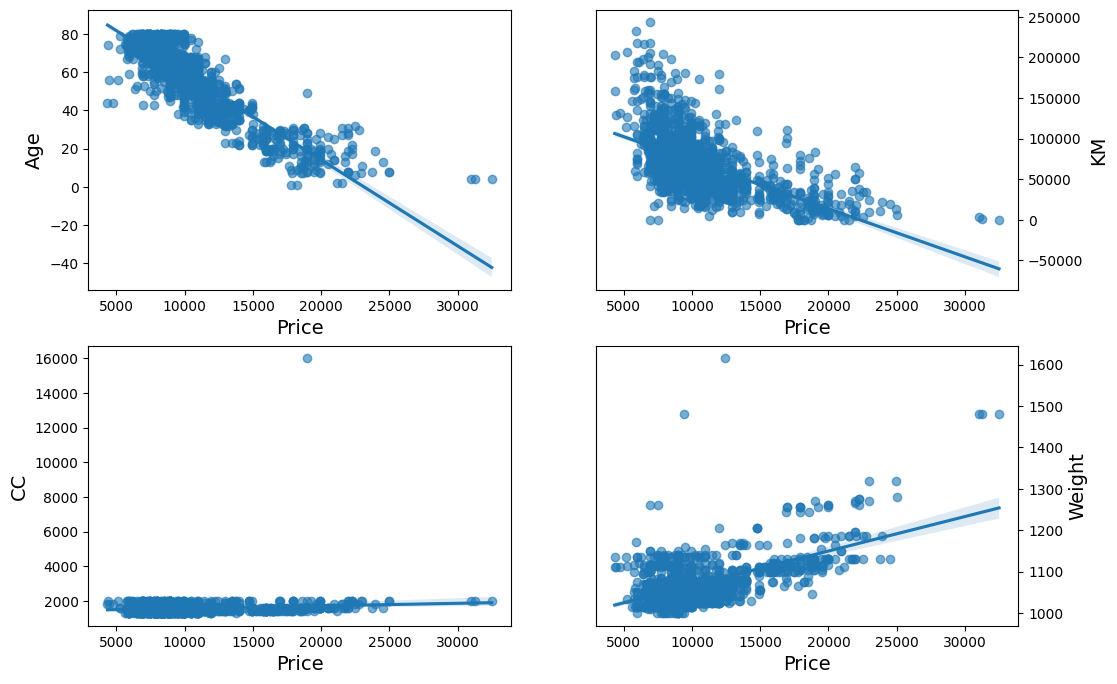

In [ ]:
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age_08_04', data = df, ax = axes[0,0], scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = df, ax = axes[0,1], scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# CC Vs Price
sns.regplot(x = 'Price', y = 'cc', data = df, ax = axes[1,0], scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('CC', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Weight', data = df, ax = axes[1,1], scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

#Model Building
#model 1
predicting price using Age_08_04



In [ ]:
x=df[['Age_08_04']]
y=df['Price']

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_Train,Y_Train)

LinearRegression()

In [ ]:
l=model.predict(X_Test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Test, l))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Test, l))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_Test, l, squared=False))

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Absolute Error: 1152.0266262290684
Mean Squared Error: 2748095.6146516902
Root Mean Squared Error: 1657.7381019484621
Coefficients: [-170.66199558]
Intercept: 20252.6019416261


In [ ]:
score=r2_score(Y_Test,l)

print('r2 socre is ',score)

r2 socre is  0.770937319953073


#model 2
predicting price using Age_08_04 and cc

In [ ]:
x=df[['Age_08_04','cc']]
y=df['Price']

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_Train,Y_Train)

LinearRegression()

In [ ]:
l=model.predict(X_Test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Test, l))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Test, l))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_Test, l, squared=False))

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
score=r2_score(Y_Test,l)

print('r2 socre is ',score)

Mean Absolute Error: 1149.3747888038674
Mean Squared Error: 2729721.2840366596
Root Mean Squared Error: 1652.186818745586
Coefficients: [-169.92285147    0.31411885]
Intercept: 19714.96935587758
r2 socre is  0.7724688799877047


Split the dataset into training and testing sets (e.g., 80% training, 20% testing

#model 3


In [ ]:
x=df.drop('Price',axis=1)
y=df['Price']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_Train,Y_Train)
l=model.predict(X_Test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_Test, l))
print('Mean Squared Error:', metrics.mean_squared_error(Y_Test, l))
print('Root Mean Squared Error:', metrics.mean_squared_error(Y_Test, l, squared=False))

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
score=r2_score(Y_Test,l)

print('r2 socre is ',score)

Mean Absolute Error: 986.4966877482502
Mean Squared Error: 2155628.3561396208
Root Mean Squared Error: 1468.2058289421211
Coefficients: [-1.21229191e+02 -1.59971491e-02  1.60754378e+01  2.68822211e+02
 -4.71094877e-02 -8.80971638e+01  4.55011874e+02  2.63612017e+01
 -2.46416406e+02  6.36100249e+02  8.82516655e+02]
Intercept: -14504.921069098269
r2 socre is  0.820321386996181


#Ridge Regression Model

In [ ]:
X_ridge_reg = df.drop('Price', axis = 1).values
y_ridge_reg = df["Price"].values.reshape(-1,1)
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_ridge_reg, X_test_ridge_reg, y_train_ridge_reg, y_test_ridge_reg = train_test_split(X_ridge_reg,y_ridge_reg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_ridge_reg.shape, y_train_ridge_reg.shape)
print('Test Dataset : ', X_test_ridge_reg.shape, y_test_ridge_reg.shape)
ridgeReg = Ridge(alpha=0.05)

ridgeReg.fit(X_train_ridge_reg,y_train_ridge_reg)

# Use the model to predict the test dataset.
y_ridgereg_pred_test = ridgeReg.predict(X_test_ridge_reg)

# Use the model to predict the train dataset.
y_ridgereg_pred_train = ridgeReg.predict(X_train_ridge_reg)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_ridgereg_train = r2_score(y_ridgereg_pred_train, y_train_ridge_reg)
r2_score_ridgereg_test = r2_score(y_ridgereg_pred_test, y_test_ridge_reg)
rmse_ridgereg = np.sqrt(mean_squared_error(y_ridgereg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_ridgereg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_ridgereg_test)
print('root mean squared error for multi linear reg : ', rmse_ridgereg)

Train Dataset :  (1076, 11) (1076, 1)
Test Dataset :  (359, 11) (359, 1)
r2_ score for train dataset for multi linear reg :  0.8344533176085938
r2_ score for test dataset for multi linear reg :  0.8536772524904119
root mean squared error for multi linear reg :  1806127.123579866


#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

## training the model

lassoReg = Lasso(alpha=0.3)

lassoReg.fit(X_train_ridge_reg,y_train_ridge_reg)

# Use the model to predict the test dataset.
y_lassoreg_pred_test = lassoReg.predict(X_test_ridge_reg)

# Use the model to predict the train dataset.
y_lassoreg_pred_train = lassoReg.predict(X_train_ridge_reg)

# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_lassoreg_train = r2_score(y_lassoreg_pred_train, y_train_ridge_reg)
r2_score_lassoreg_test = r2_score(y_lassoreg_pred_test, y_test_ridge_reg)
rmse_lassoreg = np.sqrt(mean_squared_error(y_lassoreg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_lassoreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_lassoreg_test)
print('root mean squared error for multi linear reg : ', rmse_lassoreg)

r2_ score for train dataset for multi linear reg :  0.8344337050360965
r2_ score for test dataset for multi linear reg :  0.853639194853839
root mean squared error for multi linear reg :  1806341.8338040903
